In [13]:
import pickle
from sklearn.metrics import matthews_corrcoef, accuracy_score, confusion_matrix, classification_report

In [18]:
import pandas as pd
import cufflinks as cf
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np
import plotly.figure_factory as ff

init_notebook_mode(connected=True)
cf.go_offline()

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [50]:
def compute_statistics(targets, preds, preds_probas):
    MCC = matthews_corrcoef(y_true=targets, y_pred=preds)
    ACC = accuracy_score(y_true=targets, y_pred=preds)

    print(f'MCC: {MCC}\nACC: {ACC}')
    print('************************')
    print(classification_report(y_true=targets, y_pred=preds))
    print('************************')
    print(confusion_matrix(y_true=targets, y_pred=preds))
    
    y_true = np.array([[1,0] if t == 0 else [0,1] for t in targets ])
    y_score = preds_probas
    n_classes = 2
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    

    '''
    # Add traces
    data = []

    data.append(go.Scatter(x=fpr[2], y=tpr[2],
                        mode='lines',
                        name='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(2, roc_auc[2])))

    data.append(go.Scatter(x=[0, 1], y=[0, 1],
                        mode='lines',
                        name='Random Baseline'))


    layout = go.Layout(title='Receiver operating characteristic example',
                        autosize=True,
                        xaxis={"title": 'False Positive Rate'},
                        yaxis={"title": 'True Positive Rate'}, 
                       showlegend=True
                       )

    fig = go.Figure(data=data, layout=layout)


    fig.show()
    '''

    # Compute macro-average ROC curve and ROC area
    #n_classes = 3
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves

    # Add traces
    data = []
    data.append(go.Scatter(x=fpr["micro"], y=tpr["micro"],
                        mode='lines',
                        name='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"])))

    data.append(go.Scatter(x=fpr["macro"], y=tpr["macro"],
                        mode='lines',
                        name='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"])))

    for i in range(n_classes):
        data.append(go.Scatter(x=fpr[i], y=tpr[i],
                            mode='lines',
                            name='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i])))

    data.append(go.Scatter(x=[0, 1], y=[0, 1],
                        mode='lines',
                        name='Random Baseline'))


    layout = go.Layout(title='Receiver operating characteristic example',
                        autosize=True,
                        xaxis={"title": 'False Positive Rate'},
                        yaxis={"title": 'True Positive Rate'}, 
                       showlegend=True
                       )

    fig = go.Figure(data=data, layout=layout)


    fig.show()
    
    cm = confusion_matrix(y_true=targets, y_pred=preds)
    x = [str(val)+' class' for val in range(n_classes)]
    y = [str(val)+' class' for val in range(n_classes)]
    y.reverse()
    z = list(cm)
    z.reverse()

    trace1 = go.Heatmap( 
      x = x, 
      y = y,
      z = cm
    )
    data = [trace1]
    layout = go.Layout(title="Confusion Matrix",
                        autosize=True,
                        xaxis={"title": "Predicted value"},
                        yaxis={"title": "Real value"},
                        )
    fig = go.FigureWidget(data=data, layout=layout)
    #fig.show()

    fig = ff.create_annotated_heatmap(z=z, x=x, y= y, colorscale='Viridis')
    fig.show()

MCC: 0.8893435833502292
ACC: 0.94465
************************
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     10000
           1       0.95      0.94      0.94     10000

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000

************************
[[9496  504]
 [ 603 9397]]


/Users/zarbo/miniconda3/envs/bioshield/lib/python3.6/site-packages/ipykernel_launcher.py:63: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



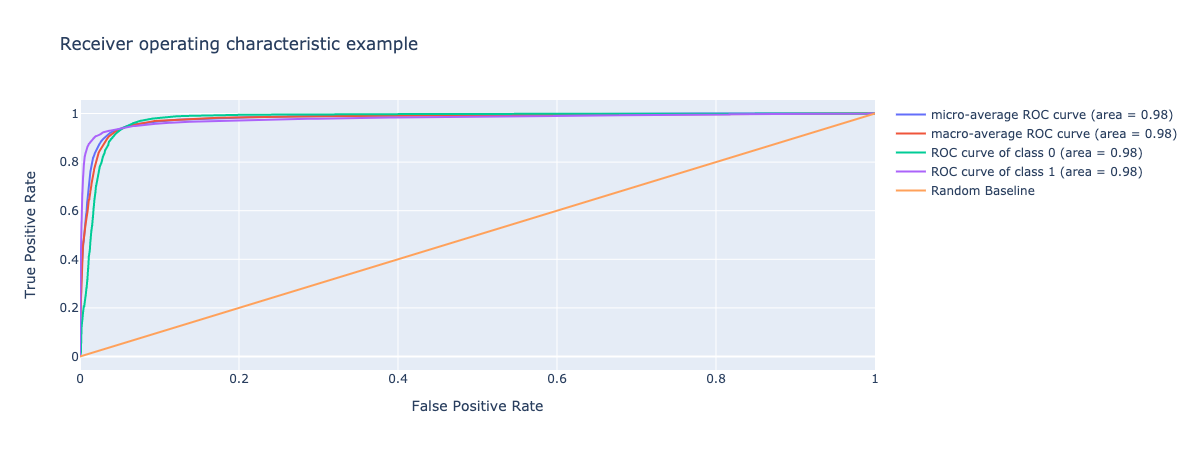

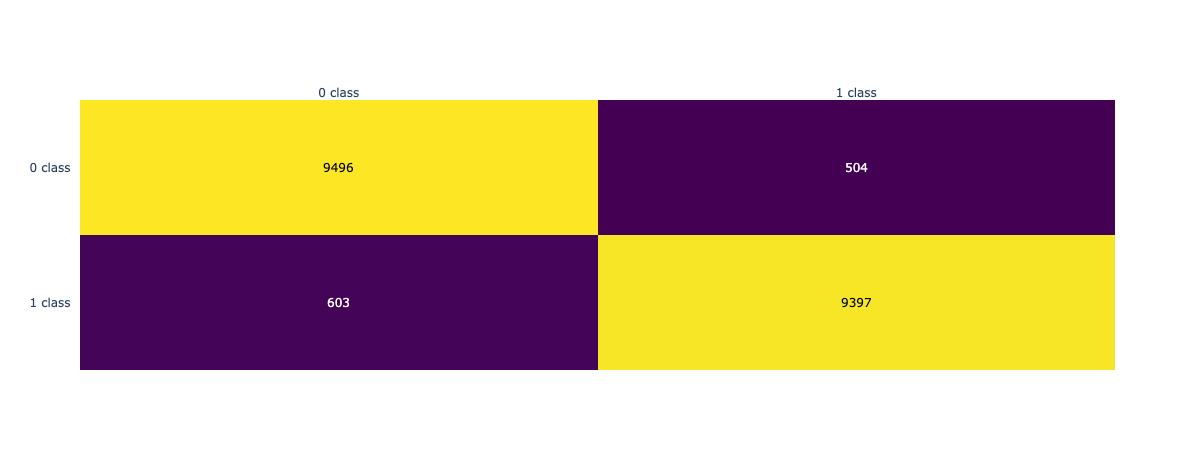

In [51]:
results_nolowercase = pickle.load(open('./STS-Benchmark/glue_data/molsim_output_NOlowercase/preds_labels.pkl','rb'))
compute_statistics(targets=results_nolowercase['labels'], preds=results_nolowercase['preds'], preds_probas=results_nolowercase['preds_probs'])

MCC: 0.8798862330764693
ACC: 0.9399
************************
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10000
           1       0.95      0.93      0.94     10000

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000

************************
[[9469  531]
 [ 671 9329]]


/Users/zarbo/miniconda3/envs/bioshield/lib/python3.6/site-packages/ipykernel_launcher.py:63: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



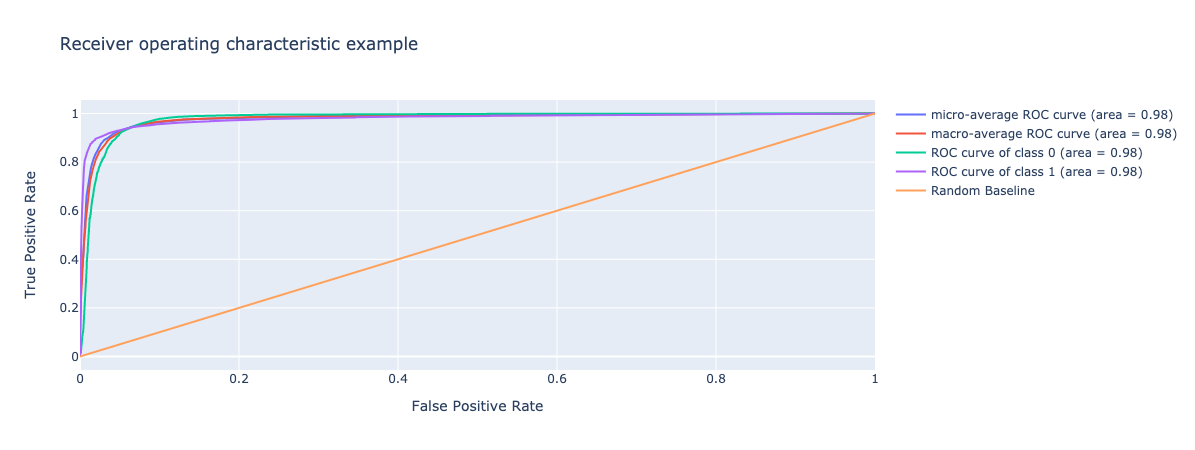

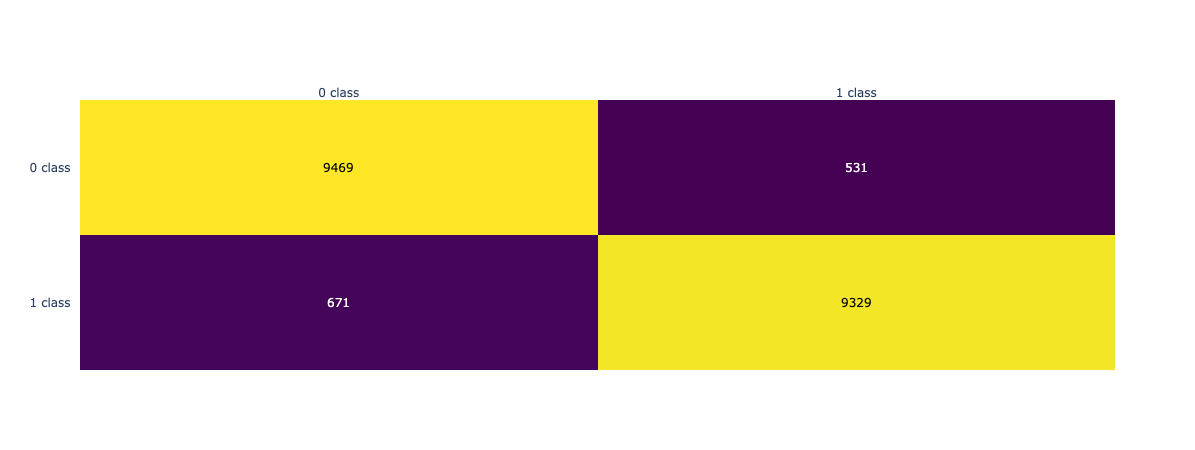

In [52]:
results_lowercase = pickle.load(open('./STS-Benchmark/glue_data/molsim_output_dolowercase/preds_labels.pkl','rb'))
compute_statistics(targets=results_lowercase['labels'], preds=results_lowercase['preds'], preds_probas=results_lowercase['preds_probs'])

/Users/zarbo/miniconda3/envs/bioshield/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning:

invalid value encountered in double_scalars

/Users/zarbo/miniconda3/envs/bioshield/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



MCC: 0.0
ACC: 0.5
************************
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     10000
           1       0.00      0.00      0.00     10000

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.33     20000
weighted avg       0.25      0.50      0.33     20000

************************
[[10000     0]
 [10000     0]]


/Users/zarbo/miniconda3/envs/bioshield/lib/python3.6/site-packages/ipykernel_launcher.py:63: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



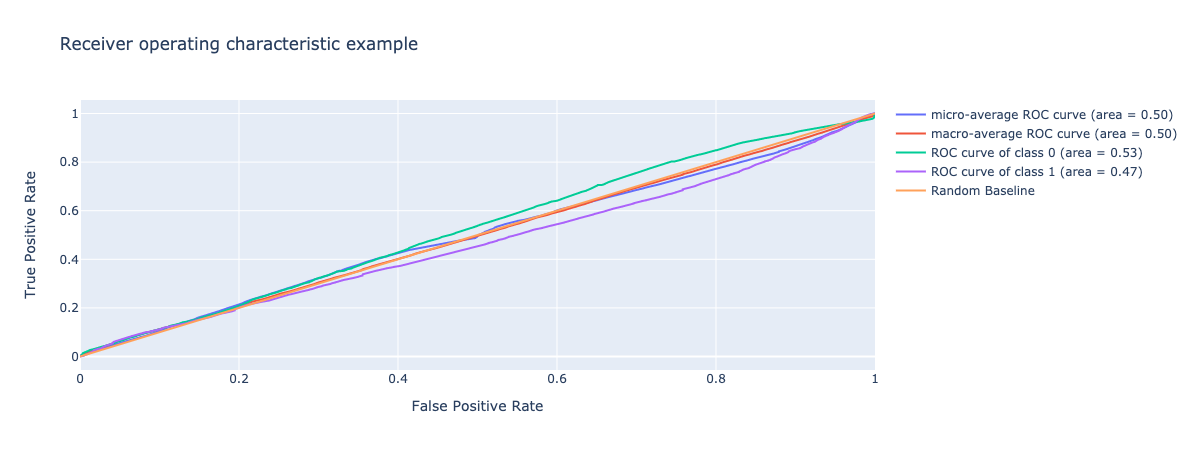

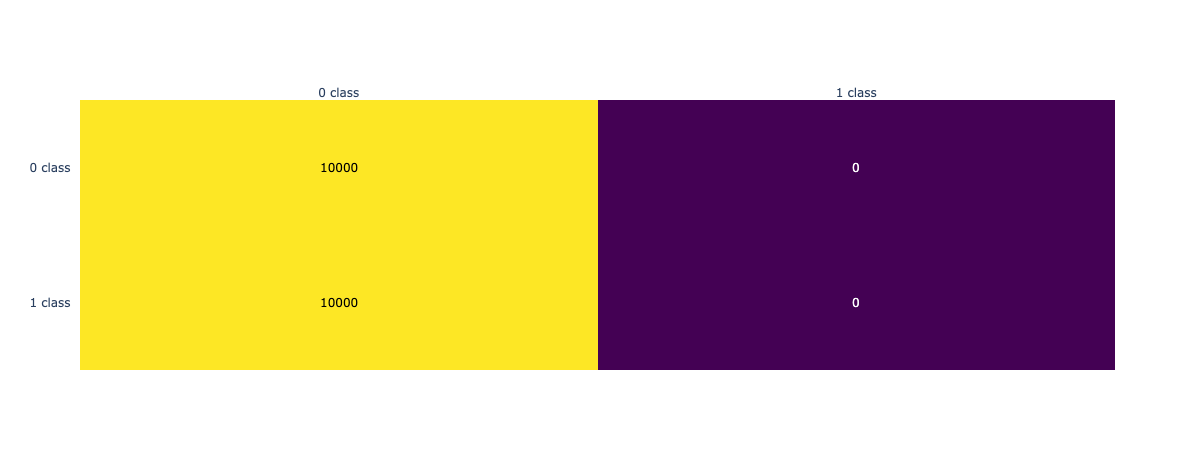

In [53]:
results_nolowercase_random = pickle.load(open('./STS-Benchmark/glue_data/molsim_output_NOlowercase_random/preds_labels.pkl','rb'))
compute_statistics(targets=results_nolowercase_random['labels'], preds=results_nolowercase_random['preds'], preds_probas=results_nolowercase_random['preds_probs'])